In [257]:
import numpy as np
import matplotlib.pyplot as plt

In [258]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [259]:
def input_data():
  dataX, dataY = [], []
  with open('/content/drive/MyDrive/PPSPhan2/MeanSquaredError/input.txt', 'r') as file:
    for line in file:
      # print(line)
      
      _X, _Y = line.split(' ')
      dataX.append(float(_X))
      dataY.append(float(_Y))
  
  if len(dataX) == len(dataY): 
    print('Input Satisfied !')
  else:
    print('Error ! ')

  dataX = np.asarray(dataX)
  dataY = np.asarray(dataY)
  return dataX, dataY

In [260]:
dataX, dataY = input_data()

Input Satisfied !


In [261]:
print(dataX)
print(dataY)

[0.78 1.56 2.34 3.12 3.81]
[2.5  1.2  1.12 2.25 4.28]


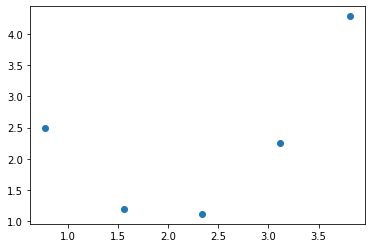

In [262]:
plt.scatter(dataX, dataY)

In [263]:
def u0(x):
  return 1
def u1(x):
  return x
def u2(x):
  return x**2
def u3(x):
  return x**3
def u4(x):
  return x**4
def u5(x):
  return np.sin(x)
def u6(x):
  return np.cos(x)
def u7(x):
  return np.sin(2*x)
def u8(x):
  return np.cos(2*x)
def u9(x):
  return np.exp(x)
def u10(x):
  return np.exp(-x)

In [264]:
def call_func(u, x):
  result = []
  for i in range(len(u)):
    temp = list(map(u[i], x))
    result.append(temp)

  return np.array(result).T

In [265]:
def vienquanh_inverse(A):
    n, _ = A.shape
    if n == 1:
        return 1 / A
    elif n > 1:
        start = 1 / A[0,0]
        for i in range(n-1):
            alpha11 = start
            alpha12 = A[:(i+1),i+1].reshape(i+1,1)
            alpha21 = A[i+1,:i+1]
            alpha22 = A[i+1,i+1]
            if i == 0:
                X = alpha11 * alpha12
            else:
                X = alpha11 @ alpha12
            if i == 0:
                Y = alpha21 * alpha11
            else :
                Y = alpha21 @ alpha11
                Y = Y.reshape(1,-1)
            if i == 0:
                theta = alpha22 - Y * alpha12
            else :
                theta = alpha22 - Y @ alpha12           
            if i == 0:
                beta11 = alpha11 + (1/theta) * (X*Y)
            else :
                beta11 = alpha11 + (1/theta) * (X@Y)            
            beta12 = -(1/theta) * X
            beta21 = -(1/theta) *Y
            beta22 = 1 / theta
            tempt_result = np.vstack((np.hstack((beta11,beta12)),np.hstack((beta21,beta22))))
            start = tempt_result
        return tempt_result

In [266]:
def mse(y_test, dataY):
  n = len(dataY)
  mse = 0
  for i in range(n):
    mse += (y_test[i] - dataY[i]) ** 2
  mse = np.sqrt(mse / n)
  return mse

In [267]:
# u = [u0,u1,u2,u3,u4,u10]
u = [u0,u1,u2]

In [268]:
theta = call_func(u, dataX)
print(theta)

[[ 1.      0.78    0.6084]
 [ 1.      1.56    2.4336]
 [ 1.      2.34    5.4756]
 [ 1.      3.12    9.7344]
 [ 1.      3.81   14.5161]]


In [269]:
M = theta.T @ theta 
print(M)

[[  5.          11.61        32.7681    ]
 [ 11.61        32.7681     102.761541  ]
 [ 32.7681     102.761541   341.75045745]]


In [270]:
coef_matrix = np.linalg.pinv(M) @ theta.T @ dataY
#coef_matrix = vienquanh_inverse(M) @ theta.T @ dataY
print(coef_matrix)

[ 5.02214761 -4.01426024  1.0023414 ]


In [271]:
def find_y(dataX, u, coef_matrix):
  y = 0
  for i in range(len(u)):
    y += coef_matrix[i] * u[i](dataX)
  return y

In [272]:
y_test = find_y(dataX, u, coef_matrix)
print(y_test)

[2.50084913 1.19919967 1.11719924 2.25484782 4.27790414]


In [282]:
def graphic(dataX, dataY, u, coef_matrix):
  X_test = np.linspace(dataX.min(), dataY.max(), 1000000)
  Y_test = []
  for i in range(len(X_test)):
    Y_test.append(find_y(X_test[i], u, coef_matrix))
  plt.scatter(dataX, dataY, s = 30, color = 'blue')
  plt.plot(X_test, Y_test, color = 'red')
  plt.tight_layout()
  # plt.ylim(7,10)
  plt.show()

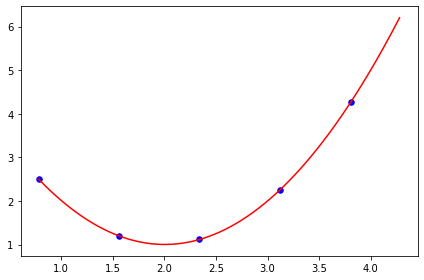

In [283]:
graphic(dataX, dataY, u, coef_matrix)

In [275]:
print('Sai so trung binh phuong: \n')
print(mse(y_test, dataY))

Sai so trung binh phuong: 

0.0027239598863592674


In [276]:
u = [u0, u1, u2]

In [277]:
theta = call_func(u, dataX)
print(theta)

[[ 1.      0.78    0.6084]
 [ 1.      1.56    2.4336]
 [ 1.      2.34    5.4756]
 [ 1.      3.12    9.7344]
 [ 1.      3.81   14.5161]]


In [278]:
M = theta.T @ theta 
print(M)

[[  5.          11.61        32.7681    ]
 [ 11.61        32.7681     102.761541  ]
 [ 32.7681     102.761541   341.75045745]]


In [279]:
coef_matrix = np.linalg.pinv(M) @ theta.T @ dataY
print(coef_matrix)

[ 5.02214761 -4.01426024  1.0023414 ]


In [280]:
y_test1 = find_y(dataX, u, coef_matrix)
print(y_test1)

[2.50084913 1.19919967 1.11719924 2.25484782 4.27790414]


In [281]:
print(dataY)

[2.5  1.2  1.12 2.25 4.28]
